In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")

In [3]:
train_set = dataset_train.iloc[:,1:2].values

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
sc = MinMaxScaler()

In [6]:
scaled_training = sc.fit_transform(train_set)

In [7]:
x_train = []
y_train = []

In [8]:
for i in range(60,1258):
    x_train.append(scaled_training[i-60:i,0])
    y_train.append(scaled_training[i,0])
    
"""iteration 1 :
    x_train.append(scaled_training[0:60,0])
    y_train.append(scaled_training[60,0])
    x_tarin = [0,1,2,3,4,5,6,7,8,9,10  ..... 59]
    y_train =  [60]
iteration 2 :
    x_train.append(scaled_training[1:61,0])
    y_train.append(scaled_training[61,0])
    x_tarin = [[0,1,2,3,4,5,6,7,8,9,10  ..... 59],
               [1,2,3,4,5,6,7,8,9,10,11 .......60]]
    y_train =  [[60],[61]]    
iteration 3 :
    x_train.append(scaled_training[2:62,0])
    y_train.append(scaled_training[62,0])
    x_tarin = [[0,1,2,3,4,5,6,7,8,9,10  ..... 59],
               [1,2,3,4,5,6,7,8,9,10,11 .......60],
               [2,3,4,5,6,7,8,9,10,11 .......61]]
    y_train =  [[60],[61],[62]]
iteration 1258 """

'iteration 1 :\n    x_train.append(scaled_training[0:60,0])\n    y_train.append(scaled_training[60,0])\n    x_tarin = [0,1,2,3,4,5,6,7,8,9,10  ..... 59]\n    y_train =  [60]\niteration 2 :\n    x_train.append(scaled_training[1:61,0])\n    y_train.append(scaled_training[61,0])\n    x_tarin = [[0,1,2,3,4,5,6,7,8,9,10  ..... 59],\n               [1,2,3,4,5,6,7,8,9,10,11 .......60]]\n    y_train =  [[60],[61]]    \niteration 3 :\n    x_train.append(scaled_training[2:62,0])\n    y_train.append(scaled_training[62,0])\n    x_tarin = [[0,1,2,3,4,5,6,7,8,9,10  ..... 59],\n               [1,2,3,4,5,6,7,8,9,10,11 .......60],\n               [2,3,4,5,6,7,8,9,10,11 .......61]]\n    y_train =  [[60],[61],[62]]\niteration 1258 '

In [9]:
x_train,y_train = np.array(x_train),np.array(y_train)

In [10]:
x_train.shape

(1198, 60)

In [11]:
y_train.shape

(1198,)

In [12]:
print(x_train.ndim, y_train.ndim)

2 1


In [13]:
x_train = np.reshape(x_train,(1198,60,1))

In [14]:
x_train.shape

(1198, 60, 1)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,LSTM,Dropout

In [16]:
model = Sequential()

In [17]:
model.add(LSTM( units = 60 ,return_sequences = True , input_shape = (60,1)))
model.add(Dropout(0.2))
model.add(LSTM( units = 60 ,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 60 , return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 60 ))
model.add(Dropout(0.2))

In [18]:
model.add(Dense(units =1))

In [19]:
model.compile("rmsprop",loss = "mean_squared_error")

In [20]:
model.fit(x_train,y_train,epochs = 300)

Epoch 1/300
38/38 [==============================] - 1s 14ms/step - loss: 0.0386
Epoch 2/300
38/38 [==============================] - 0s 13ms/step - loss: 0.0138
Epoch 3/300
38/38 [==============================] - 0s 13ms/step - loss: 0.0111
Epoch 4/300
38/38 [==============================] - 0s 13ms/step - loss: 0.0103
Epoch 5/300
38/38 [==============================] - 1s 13ms/step - loss: 0.0096
Epoch 6/300
38/38 [==============================] - 0s 13ms/step - loss: 0.0083
Epoch 7/300
38/38 [==============================] - 0s 13ms/step - loss: 0.0068
Epoch 8/300
38/38 [==============================] - 0s 13ms/step - loss: 0.0073
Epoch 9/300
38/38 [==============================] - 0s 13ms/step - loss: 0.0068
Epoch 10/300
38/38 [==============================] - 0s 13ms/step - loss: 0.0064
Epoch 11/300
38/38 [==============================] - 0s 13ms/step - loss: 0.0059
Epoch 12/300
38/38 [==============================] - 0s 13ms/step - loss: 0.0061
Epoch 13/300
38/38 [=====

38/38 [==============================] - 1s 14ms/step - loss: 0.0015
Epoch 101/300
38/38 [==============================] - 1s 13ms/step - loss: 0.0015
Epoch 102/300
38/38 [==============================] - 1s 13ms/step - loss: 0.0015
Epoch 103/300
38/38 [==============================] - 1s 13ms/step - loss: 0.0015
Epoch 104/300
38/38 [==============================] - 1s 14ms/step - loss: 0.0015
Epoch 105/300
38/38 [==============================] - 1s 14ms/step - loss: 0.0015
Epoch 106/300
38/38 [==============================] - 1s 14ms/step - loss: 0.0014
Epoch 107/300
38/38 [==============================] - 1s 14ms/step - loss: 0.0015
Epoch 108/300
38/38 [==============================] - 1s 14ms/step - loss: 0.0015
Epoch 109/300
38/38 [==============================] - 1s 14ms/step - loss: 0.0014
Epoch 110/300
38/38 [==============================] - 1s 13ms/step - loss: 0.0015
Epoch 111/300
38/38 [==============================] - 1s 13ms/step - loss: 0.0015
Epoch 112/300
38/3

38/38 [==============================] - 1s 15ms/step - loss: 0.0011
Epoch 199/300
38/38 [==============================] - 1s 13ms/step - loss: 0.0012
Epoch 200/300
38/38 [==============================] - 1s 13ms/step - loss: 0.0011
Epoch 201/300
38/38 [==============================] - 1s 14ms/step - loss: 0.0011
Epoch 202/300
38/38 [==============================] - 1s 14ms/step - loss: 0.0011
Epoch 203/300
38/38 [==============================] - 1s 13ms/step - loss: 0.0011
Epoch 204/300
38/38 [==============================] - 1s 14ms/step - loss: 0.0011
Epoch 205/300
38/38 [==============================] - 1s 15ms/step - loss: 0.0010
Epoch 206/300
38/38 [==============================] - 1s 15ms/step - loss: 0.0011
Epoch 207/300
38/38 [==============================] - 1s 15ms/step - loss: 0.0011
Epoch 208/300
38/38 [==============================] - 1s 13ms/step - loss: 0.0011
Epoch 209/300
38/38 [==============================] - 1s 13ms/step - loss: 0.0011
Epoch 210/300
38/3

Epoch 296/300
38/38 [==============================] - 1s 14ms/step - loss: 9.6820e-04
Epoch 297/300
38/38 [==============================] - 1s 15ms/step - loss: 9.3997e-04
Epoch 298/300
38/38 [==============================] - 1s 14ms/step - loss: 9.0136e-04
Epoch 299/300
38/38 [==============================] - 1s 15ms/step - loss: 0.0010
Epoch 300/300
38/38 [==============================] - 1s 14ms/step - loss: 9.7335e-04


In [21]:
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")

In [22]:
y_test = dataset_test.iloc[:,1:2]

In [23]:
dataset_total = pd.concat((dataset_train["Open"],dataset_test["Open"]),axis = 0)

In [24]:
inputs  = dataset_total[len(dataset_total)-len(dataset_test)- 60:].values

In [25]:
inputs = inputs.reshape(-1,1)

In [26]:
inputs = sc.fit_transform(inputs)

In [27]:
x_test = []

In [28]:
for i in range(60,80):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test= np.reshape(x_test,(20,60,1))

In [29]:
ypred = model.predict(x_test)

In [30]:
ypred.shape

(20, 1)

In [31]:
ypred = sc.inverse_transform(ypred)

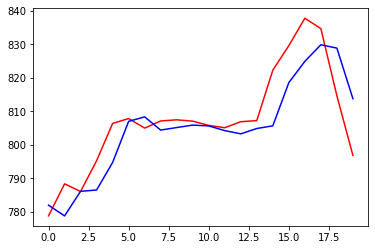

In [32]:
plt.plot(y_test, color ="red", label = "actual stock price")
plt.plot(ypred, color ="blue",label = "predicted stock price")
plt.show()

In [33]:
test= []

In [34]:
for i in range (60 ,120): 
      test.append(i)
test = np.array(test) 
test = test.reshape(-1,1)
test = np.reshape(test, (1,60,1))

In [35]:
yp = model.predict (test)

In [36]:
yp = sc.inverse_transform(yp)

In [37]:
print(yp)

[[814.4367]]


In [38]:
test =  [343,456,756,678,786,456,567,343,767,123,343,456,756,678,786,456,567,343,767,123,343,456,756,678,786,456,567,343,767,123,343,456,756,678,786,456,567,343,767,123,343,456,756,678,786,456,567,343,767,123,343,456,756,678,786,456,567,343,767,123]

In [40]:
len(test)

60

In [41]:
test = np.array(test) 
test = test.reshape(-1,1)
test = np.reshape(test, (1,60,1))

In [42]:
yp = model.predict (test)

In [43]:
yp = sc.inverse_transform(yp)

In [44]:
print(yp)

[[814.4369]]


In [ ]:
accuracy